In [ ]:
#Lesssssgoooooooo

In [2]:
%%shell
# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700

Executing: /tmp/apt-key-gpghome.gCGY5KKbaE/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.kP3RgGS5Id/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.MqRT2F9i6b/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [3]:
# Install chromium and chromium-driver
!apt-get update
!apt-get install chromium chromium-driver

# Install selenium
!pip install selenium
from selenium import webdriver
from bs4 import BeautifulSoup

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://deb.debian.org/debian-security buster/updates InRelease
Hit:7 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package

In [4]:
#We will be using the chrome webdriver
from selenium.webdriver.common.by import By
import time #to pause the webdriver so that the page can load
from selenium.webdriver.common.keys import Keys
from datetime import date
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.select import Select
import os
options = Options()
prefer = {"download.default_directory": "/content/"}
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument('--disable-dev-shm-usage')
options.add_experimental_option("prefs",prefer)

driver = webdriver.Chrome("chromedriver", options=options)
driver.maximize_window()

In [5]:
driver.get("https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=91")
companies = []
for val in driver.find_elements(By.CLASS_NAME, 'TTRow'):
    companies.append(val.text)

len(companies)

141

In [7]:
driver.get("https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.aspx?flag=0")
driver.maximize_window()
time.sleep(2)

# if not EC.element_to_be_clickable((By.ID, "ContentPlaceHolder1_txtFromDate")):
#     time.sleep(5)
element = driver.find_element(By.ID, "ContentPlaceHolder1_divMFdate")
element = driver.find_element(By.ID, "ContentPlaceHolder1_txtFromDate")
element.click()
# driver.find_element(By.ID, "ContentPlaceHolder1_txtFromDate")
Select(driver.find_element(By.CLASS_NAME, "ui-datepicker-year")).select_by_value('2013')
Select(driver.find_element(By.CLASS_NAME, "ui-datepicker-month")).select_by_value('3')
driver.find_element(By.XPATH, "//a[text()='1']").click()
# fromfield.send_keys(start)
# fromfield.send_keys(Keys.ENTER)
# print('entered')
driver.find_element(By.ID, "ContentPlaceHolder1_txtToDate").click()
Select(driver.find_element(By.CLASS_NAME, "ui-datepicker-year")).select_by_value('2022')
Select(driver.find_element(By.CLASS_NAME, "ui-datepicker-month")).select_by_value('3')
driver.find_element(By.XPATH, "//a[text()='1']").click()

In [8]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def downloader(name):
    field = driver.find_element(By.ID, "ContentPlaceHolder1_smartSearch")

    field.clear()
    field.send_keys(name)
    option = driver.find_element(By.CLASS_NAME, "quotemenu")
    option.click()
    element = driver.find_element(By.ID, "ContentPlaceHolder1_btnSubmit")
    driver.execute_script("arguments[0].click();", element)

    print(driver.find_element(By.ID, 'ContentPlaceHolder1_lblCompanyValue').text)

    driver.find_element(By.CLASS_NAME, "blackbredcrumb").click()
    while not any(fname.endswith(f'{name}.csv') for fname in os.listdir()):
        time.sleep(1)


In [9]:
for i in companies[:25]:
    downloader(i)


HOUSING DEVELOPMENT FINANCE CORP.LTD.

AXIS BANK LTD.

ICICI BANK LTD.

HDFC Life Insurance Company Ltd

AU Small Finance Bank Ltd

IDFC First Bank Ltd

SBI Life Insurance Company Ltd

REC Ltd

MAHINDRA & MAHINDRA FINANCIAL SERVICES LTD.

POWER FINANCE CORPORATION LTD.

IDFC LIMITED

YES BANK LTD.

HDFC Asset Management Company Ltd

LIC HOUSING FINANCE LTD.

Indian Railway Finance Corporation Ltd

FEDERAL BANK LTD.

SBI Cards and Payment Services Ltd

Indiabulls Housing Finance Ltd

ICICI Prudential Life Insurance Company Ltd

Bandhan Bank Ltd

Max Financial Services Ltd

CANARA BANK

INDIAN BANK

PUNJAB NATIONAL BANK

Cholamandalam Financial Holdings Ltd


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import os
import glob

#Limits on number of days taken as input(lb) and number of days taken as output(lf)
lb=200
lf=10

from tensorflow.python.layers import base
import tensorflow as tf
from tensorflow import keras
from keras import layers


def inception_module(inputs, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool):
    # 1x1 conv layer
    conv_1x1 = tf.keras.layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='linear')(inputs)

    # 3x3 conv layer
    conv_3x3_reduce = tf.keras.layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='linear')(inputs)
    conv_3x3 = tf.keras.layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='linear')(conv_3x3_reduce)

    #5x5 conv layer
    conv_5x5_reduce = tf.keras.layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='linear')(inputs)
    conv_5x5 = tf.keras.layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='linear')(conv_5x5_reduce)

    # Max pooling layer
    max_pool = tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inputs)
    max_pool_conv = tf.keras.layers.Conv2D(filters_pool, (1, 1), padding='same', activation='linear')(max_pool)

    # Concatenate the outputs of all conv layers
    outputs = tf.keras.layers.Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, max_pool_conv])

    return outputs


def scaled_trainer(arr, lb, lf, choice):
    sc = MinMaxScaler(feature_range=(-1,1))
    tx = np.array([])
    ty = np.array([])
    t = np.array([])
    new_vals = []

    for i in arr:
        data = pd.read_csv(i).filter([choice]).iloc[::-1].values
        if choice=="Date":
            for i in data:
                _ = i[0]
                val = datetime.strptime(_, '%d-%B-%Y')
                value = val.strftime('%j')
                value = int(value)
                new_vals.append(value)
            new_vals = np.array(new_vals)
            data = new_vals.reshape((-1,1))
        data = sc.fit_transform(data)
        t = np.append(t, sliding_window_view(data, window_shape = (lb+lf,1)))

    t = t.reshape(int(t.shape[0]/(lb+lf)), lb+lf)
    for j in t:
        tx = np.append(tx, j[:lb])
        ty = np.append(ty, j[lb:])
    tx = tx.reshape((int(tx.shape[0]/lb), lb))
    ty = sc.inverse_transform(ty.reshape((-1,1)))       
    ty = ty.reshape((int(ty.shape[0]/lf), lf))

    return tx, ty

In [11]:
companies = []  
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
for i in csv_files:
    companies.append(i[9:])


In [14]:
for com in companies:
    trade_x, _ = scaled_trainer([com], lb, lf, "No. of Trades")
    shl_x, _ = scaled_trainer([com], lb, lf, "Spread High-Low")
    date_x, _ = scaled_trainer([com], lb, lf, "Date")
    wap_x, wap_y = scaled_trainer([com], lb, lf, "Close Price")
    share_x, _ = scaled_trainer([com], lb, lf, "No.of Shares")
    sco_x, _ = scaled_trainer([com], lb, lf, "Spread Close-Open")
    open_x, _ = scaled_trainer([com], lb, lf, "WAP")
    
    model_in = wap_x.reshape((-1,200,1))
    model_in = np.append(model_in, open_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, shl_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, sco_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, trade_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, share_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, date_x.reshape((-1,200,1)), axis=2)

    x = np.arange(1,lf+1)
    slopes = np.array([])
    direction = np.array([])
    for i in wap_y:
        m, _ = np.polyfit(x, i, 1)
        a, b, _ = np.polyfit(x, i, 2)
        slopes = np.append(slopes, np.array([m, a]))

    slopes = slopes.reshape((int(slopes.shape[0]/2), 2))
    
    model_out = []
    for i in slopes:
        if i[0]<=0:
            model_out.append(0)
        else:
            model_out.append(1)
        if i[1]<=0:
            model_out.append(0)
        else:
            model_out.append(1)

    model_out = np.array(model_out)
    model_out = model_out.reshape((int(model_out.shape[0]/2), 2))

    np.save(f"input {com[:-4]}", model_in)
    np.save(f"output {com[:-4]}", model_out)
    print(f"Saved data on {com[:-4]}: Input/Output", model_in.shape, model_out.shape)

Saved data on 532648: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 543066: Input/Output (301, 200, 7) (301, 2)
Saved data on 532810: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 532720: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 539437: Input/Output (1376, 200, 7) (1376, 2)
Saved data on 540611: Input/Output (964, 200, 7) (964, 2)
Saved data on 532659: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 535789: Input/Output (1940, 200, 7) (1940, 2)
Saved data on 532215: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 532814: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 532461: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 532174: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 532483: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 500253: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 504973: Input/Output (1998, 200, 7) (1998, 2)
Saved data on 500469: Input/Output (2019, 200, 7) (2019, 2)
Saved data on 500271: Input/Output (2019, 20

In [ ]:
inputs = keras.Input(shape=(200,7,1), name="input")
x = layers.Conv2D(64, 4, padding='same', activation='linear')(inputs)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.Dropout(0.2)(x)
x = inception_module(x, 128, 112, 64, 64, 32, 32)
x = inception_module(x, 256, 200, 128, 128, 112, 112)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.Dropout(0.2)(x)
x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
y = layers.GlobalMaxPool2D()(x)
output3 = layers.Dense(2, activation='softmax', name='out1')(y)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.Dropout(0.2)(x)
x = inception_module(x, 128, 112, 64, 64, 32, 32)
x = inception_module(x, 256, 200, 128, 128, 112, 112)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.Dropout(0.2)(x)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)
x = inception_module(x, 384, 192, 384, 64, 256, 256)
y = layers.GlobalMaxPool2D()(x)
output4 = layers.Dense(2, activation='softmax', name='out2')(y)
seer = keras.Model(inputs, [output3, output4], name='seer')
seer.summary()

In [ ]:
import os
checkpoint_path = "train/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
base_learning_rate = 1e-4
#seer.load_weights(checkpoint_path)
seer.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=keras.metrics.CategoricalAccuracy())

In [ ]:
history = []

for com in companies[:-1]:
    model_in = np.load(f"input {com[:-4]}.npy")
    # wap = model_in[:,:,:,0].reshape((-1, lb, 3, 1))
    # shl = model_in[:,:,:,1].reshape((-1, lb, 3, 1))
    # trades = model_in[:,:,:,2].reshape((-1, lb, 3, 1))
    model_out = np.load(f"output {com[:-4]}.npy")
    out1 = model_out[:,0].reshape((-1,1)) 
    out2 = model_out[:,1].reshape((-1,1))   

    print(f"Training on {com[:-4]} data")

    history.append(seer.fit(model_in, [out1, out1],
                            epochs=40, validation_split=0.2, verbose=2, 
                        callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-5),
                        keras.callbacks.ReduceLROnPlateau(monitor="val_loss",min_delta=0.0005, factor=0.5, patience=3, min_lr=1e-6),
                        keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True)]))

Training on 538567 data
Epoch 1/40
43/43 - 65s - loss: 1.4347 - out1_loss: 0.7038 - out2_loss: 0.7309 - out1_categorical_accuracy: 0.4325 - out2_categorical_accuracy: 0.4562 - val_loss: 1.4055 - val_out1_loss: 0.7102 - val_out2_loss: 0.6954 - val_out1_categorical_accuracy: 0.0000e+00 - val_out2_categorical_accuracy: 0.3107 - lr: 1.0000e-04 - 65s/epoch - 2s/step
Epoch 2/40
43/43 - 3s - loss: 1.3895 - out1_loss: 0.6903 - out2_loss: 0.6992 - out1_categorical_accuracy: 0.4481 - out2_categorical_accuracy: 0.4800 - val_loss: 1.5090 - val_out1_loss: 0.7492 - val_out2_loss: 0.7598 - val_out1_categorical_accuracy: 0.0000e+00 - val_out2_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-04 - 3s/epoch - 60ms/step
Epoch 3/40
43/43 - 3s - loss: 1.3848 - out1_loss: 0.6887 - out2_loss: 0.6960 - out1_categorical_accuracy: 0.4407 - out2_categorical_accuracy: 0.4458 - val_loss: 1.3787 - val_out1_loss: 0.6924 - val_out2_loss: 0.6864 - val_out1_categorical_accuracy: 0.6036 - val_out2_categorical_accuracy: 0.5

In [ ]:
companies = ["hoec.csv", "reliance.csv", "test.csv", "ongc.csv"]

for com in companies:
    trade_x, _ = scaled_trainer([com], lb, lf, "No. of Trades")
    shl_x, _ = scaled_trainer([com], lb, lf, "Spread High-Low")
    date_x, _ = scaled_trainer([com], lb, lf, "Date_val")
    wap_x, wap_y = scaled_trainer([com], lb, lf, "Close Price")
    share_x, _ = scaled_trainer([com], lb, lf, "No.of Shares")
    sco_x, _ = scaled_trainer([com], lb, lf, "Spread Close-Open")
    open_x, _ = scaled_trainer([com], lb, lf, "WAP")
    
    model_in = wap_x.reshape((-1,200,1))
    model_in = np.append(model_in, open_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, shl_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, sco_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, trade_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, share_x.reshape((-1,200,1)), axis=2)
    model_in = np.append(model_in, date_x.reshape((-1,200,1)), axis=2)

    x = np.arange(1,lf+1)
    slopes = np.array([])
    direction = np.array([])
    for i in wap_y:
        m, _ = np.polyfit(x, i, 1)
        a, b, _ = np.polyfit(x, i, 2)
        slopes = np.append(slopes, np.array([m, a]))

    slopes = slopes.reshape((int(slopes.shape[0]/2), 2))
    
    model_out = []
    for i in slopes:
        if i[0]<=0:
            model_out.append(0)
        else:
            model_out.append(1)
        if i[1]<=0:
            model_out.append(0)
        else:
            model_out.append(1)

    model_out = np.array(model_out)
    model_out = model_out.reshape((int(model_out.shape[0]/2), 2))

    np.save(f"input {com[:-4]}", model_in)
    np.save(f"output {com[:-4]}", model_out)
    print(f"Saved data on {com[:-4]}: Input/Output", model_in.shape, model_out.shape)

Saved data on hoec: Input/Output (40, 200, 7) (40, 2)
Saved data on reliance: Input/Output (40, 200, 7) (40, 2)
Saved data on test: Input/Output (40, 200, 7) (40, 2)
Saved data on ongc: Input/Output (40, 200, 7) (40, 2)


In [ ]:
testing = []
ex = np.arange(0,40)
ans0 = []
ans1 = []
out0 = np.array([])

for com in companies:
    model_in = np.load(f"input {com[:-4]}.npy")
    # wap = model_in[:,:,:,0].reshape((-1, lb, 3, 1))
    # shl = model_in[:,:,:,1].reshape((-1, lb, 3, 1))
    # trades = model_in[:,:,:,2].reshape((-1, lb, 3, 1))
    model_out = np.load(f"output {com[:-4]}.npy")
    out1 = model_out[:,0].reshape((-1,1)) 
    out2 = model_out[:,1].reshape((-1,1)) 
    print(f"Evaluating on {com[:-4]} data")
    testing.append([com[:-4], seer.evaluate(model_in, [out1, out1])])

    predict = seer.predict(model_in[ex])
    predict1 = predict[1].reshape((-1,2))
    predict0 = predict[0].reshape((-1,2))
    for i in range(len(ex)):
        ans0.append(np.where(predict0[i]>0.5)[0][0])
        ans1.append(np.where(predict1[i]>0.5)[0][0])
    out0 = np.append(out0, model_out[ex, 0])
    

Evaluating on hoec data
2/2 [==============================] - 0s 25ms/step
Evaluating on reliance data
2/2 [==============================] - 0s 25ms/step
Evaluating on test data
2/2 [==============================] - 0s 24ms/step
Evaluating on ongc data
2/2 [==============================] - 0s 25ms/step


In [ ]:
testing

[['hoec',
  [1.3153088092803955, 0.6391372680664062, 0.676171600818634, 1.0, 0.75]],
 ['reliance',
  [1.3830562829971313,
   0.6688187718391418,
   0.7142375111579895,
   1.0,
   0.30000001192092896]],
 ['test',
  [1.411332607269287,
   0.6828590631484985,
   0.7284736037254333,
   0.7250000238418579,
   0.4000000059604645]],
 ['ongc',
  [1.37565016746521,
   0.6900531053543091,
   0.6855971217155457,
   1.0,
   0.8999999761581421]]]

In [ ]:
# seer.evaluate(model_in, [out1, out1])

40/40 [==============================] - 2s 24ms/step - loss: 1.3880 - out1_loss: 0.6946 - out2_loss: 0.6934 - out1_categorical_accuracy: 0.7549 - out2_categorical_accuracy: 0.6006


[1.387966513633728,
 0.6945967078208923,
 0.6933698058128357,
 0.7548942565917969,
 0.6006264686584473]

In [ ]:
len(ans0), out0.shape

(160, (160,))

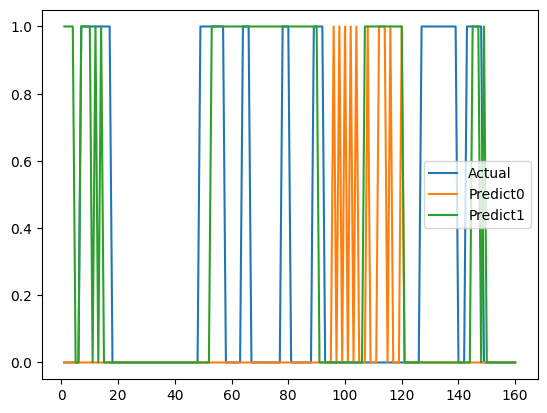

In [ ]:
xval = np.arange(1,(40*len(companies)+1))
plt.plot(xval, out0, xval, ans0, xval, ans1)
plt.legend(["Actual", "Predict0", "Predict1"])

<function matplotlib.pyplot.show(close=None, block=None)>

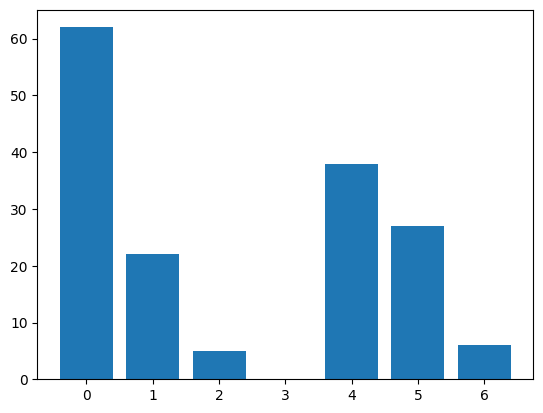

In [ ]:
tally = []
for i in range(len(out0)):
    if out0[i]==ans0[i] and out0[i]==ans1[i]:
      tally.append(0)
    elif out0[i]>ans0[i] and out0[i]==ans1[i]:
      tally.append(1)
    elif out0[i]<ans0[i] and out0[i]==ans1[i]:
      tally.append(2)
    elif out0[i]==ans0[i] and out0[i]>ans1[i]:
      tally.append(3)
    elif out0[i]==ans0[i] and out0[i]<ans1[i]:
      tally.append(4)
    elif out0[i]>ans0[i] and out0[i]>ans1[i]:
      tally.append(5)
    elif out0[i]<ans0[i] and out0[i]<ans1[i]:
      tally.append(6)
    else:
      tally.append(7)

tally = np.array(tally)
bins = np.arange(0, 8)
hist, _ = np.histogram(tally, bins=bins)
plt.bar(bins[:-1], hist)
plt.xticks(bins[:-1])
plt.show

In [ ]:
print(hist)

[62 22  5  0 38 27  6]
